In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../csv/2011/movimientos_stock sep-2011')
df.head()

,fecha,descripcion,astromelias,lisiantus,montoneras,gladiolo,ramito,crisantemo,rosa,clavel
0,11-09-2011,SALDO INICIAL,0.0,0.0,0.0,3.0,0.0,44.0,34.0,362.0
1,11-09-2011,COMPRA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11-09-2011,VENTA TOTAL,0.0,0.0,0.0,3.0,0.0,24.0,23.0,133.0
3,11-09-2011,SERVICIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
4,11-09-2011,ROTAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
df_venta = df[df['descripcion'] == 'VENTA TOTAL']
df_venta.head()

,fecha,descripcion,astromelias,lisiantus,montoneras,gladiolo,ramito,crisantemo,rosa,clavel
2,11-09-2011,VENTA TOTAL,0.0,0.0,0.0,3.0,0.0,24.0,23.0,133.0
10,17-09-2011,VENTA TOTAL,0.0,0.0,15.0,7.0,0.0,68.0,124.0,561.0
18,18-09-2011,VENTA TOTAL,0.0,0.0,18.0,30.0,0.0,102.0,228.0,978.0
26,19-09-2011,VENTA TOTAL,0.0,0.0,8.0,3.0,0.0,11.0,40.0,178.0
34,20-09-2011,VENTA TOTAL,0.0,0.0,3.0,2.0,0.0,0.0,34.0,46.0


In [7]:
df_venta.describe()

,astromelias,lisiantus,montoneras,gladiolo,ramito,crisantemo,rosa,clavel
count,13.0,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.0,0.0,4.000000,8.538462,5.846154,31.000000,70.769231,313.692308
std,0.0,0.0,6.110101,12.272024,17.082380,41.323924,73.797193,361.061718
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,15.000000,46.000000
25%,0.0,0.0,0.000000,2.000000,0.000000,2.000000,30.000000,73.000000
50%,0.0,0.0,0.000000,3.000000,0.000000,11.000000,40.000000,157.000000
75%,0.0,0.0,5.000000,7.000000,0.000000,31.000000,50.000000,317.000000
max,0.0,0.0,18.000000,40.000000,61.000000,125.000000,228.000000,1143.000000


In [16]:
lista_venta = []
for fecha in range(len(df_venta)):
    # print(df_venta.iloc[fecha, 0])
    for flor in range(2,len(df_venta.columns)):
        #print(df_venta.columns[flor])
        lista_venta.append((df_venta.iloc[fecha, 0], df_venta.columns[flor], df_venta.iloc[fecha, flor]))

In [18]:
lista_venta[:10]

[('11-09-2011', 'astromelias', 0.0),
 ('11-09-2011', 'lisiantus', 0.0),
 ('11-09-2011', 'montoneras', 0.0),
 ('11-09-2011', 'gladiolo', 3.0),
 ('11-09-2011', 'ramito', 0.0),
 ('11-09-2011', 'crisantemo', 24.0),
 ('11-09-2011', 'rosa', 23.0),
 ('11-09-2011', 'clavel', 133.0),
 ('17-09-2011', 'astromelias', 0.0),
 ('17-09-2011', 'lisiantus', 0.0)]

In [66]:
df_venta2 = pd.DataFrame(lista_venta, columns= ['Fecha', 'Producto', 'Cantidad'])

In [67]:
df_venta2

,Fecha,Producto,Cantidad
0,11-09-2011,astromelias,0.0
1,11-09-2011,lisiantus,0.0
2,11-09-2011,montoneras,0.0
3,11-09-2011,gladiolo,3.0
4,11-09-2011,ramito,0.0
...,...,...,...
99,30-09-2011,gladiolo,7.0
100,30-09-2011,ramito,0.0
101,30-09-2011,crisantemo,23.0
102,30-09-2011,rosa,40.0


In [70]:
df_venta2['Fecha'] = pd.to_datetime(df_venta2['Fecha'], format= '%d-%m-%Y', infer_datetime_format= False)
df_venta2.set_index('Fecha', inplace= True)

In [71]:
df_venta2

,Producto,Cantidad
Fecha,,
2011-09-11,astromelias,0.0
2011-09-11,lisiantus,0.0
2011-09-11,montoneras,0.0
2011-09-11,gladiolo,3.0
2011-09-11,ramito,0.0
...,...,...
2011-09-30,gladiolo,7.0
2011-09-30,ramito,0.0
2011-09-30,crisantemo,23.0


In [46]:
df_venta2.sort_index(ascending= False, inplace= True)

In [72]:
df_venta2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2011-09-11 to 2011-09-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Producto  104 non-null    object 
 1   Cantidad  104 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [73]:
df_venta2

,Producto,Cantidad
Fecha,,
2011-09-11,astromelias,0.0
2011-09-11,lisiantus,0.0
2011-09-11,montoneras,0.0
2011-09-11,gladiolo,3.0
2011-09-11,ramito,0.0
...,...,...
2011-09-30,gladiolo,7.0
2011-09-30,ramito,0.0
2011-09-30,crisantemo,23.0


In [77]:
df_filtro = df_venta2[df_venta2['Producto'].isin(['clavel', 'rosa', 'crisantemo'])]

In [78]:
df_filtro

,Producto,Cantidad
Fecha,,
2011-09-11,crisantemo,24.0
2011-09-11,rosa,23.0
2011-09-11,clavel,133.0
2011-09-17,crisantemo,68.0
2011-09-17,rosa,124.0
2011-09-17,clavel,561.0
2011-09-18,crisantemo,102.0
2011-09-18,rosa,228.0
2011-09-18,clavel,978.0


In [34]:
import seaborn as sb
import plotly.express as xp

c:\Users\Mauricio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



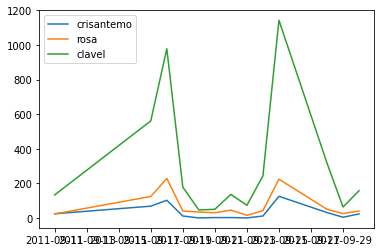

In [81]:
fig = sb.lineplot(df_filtro.index.values, df_filtro['Cantidad'].values, hue= df_filtro['Producto'].values)